# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from scipy import stats, integrate
import seaborn as sns
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.shape[0]

400

Answer: 400 observations (because there is 400 rows)

#### Question 2. Create a summary table

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because there is a much wider range of GRE scores (220-800) than GPA (2.26-4) there will very likely be a larger spread of observations from the mean in GRE than GPA.

#### Question 4. Drop data points with missing data


In [5]:
df_raw_dropna=df_raw.dropna()
print (df_raw_dropna.shape[0])

397


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The number of rows is now 397 (as seen in the cell above), down from 400. This is because we dropped 3 rows with missing values.

#### Question 6. Create box plots for GRE and GPA

In [6]:
df_raw_dropna.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

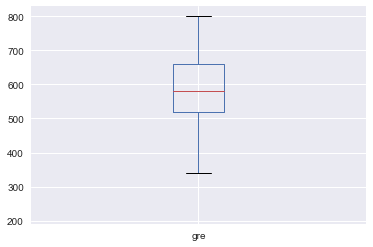

In [7]:
#boxplot 1
df_raw_dropna.gre.plot(kind='box')

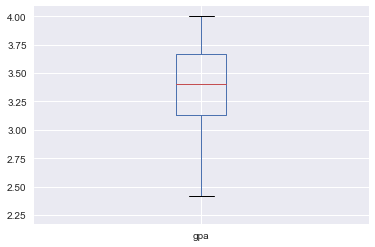

In [8]:
#boxplot 2 
df_raw_dropna.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: 
<br>For GRE
<li>The median is 588 </li>
<li>The first quartile is 520</li>
<li>The third quartile is 660</li>
<li>There are two outliers at 220 and 300</li>
<br>
<br>For GPA:
<li>The median is 3.39 </li>
<li>The first quartile is 3.13</li>
<li>The third quartile is 3.67</li>
<li>There is one outlier out 2.26</li>

#### Question 8. Describe each distribution 

The GPA data is negatively skewed but only slightly. The peakedness is relatively normal though as you can see in the density graph and from the kurtosis being close to 0. It is not exactly normally distributed but it is close.

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


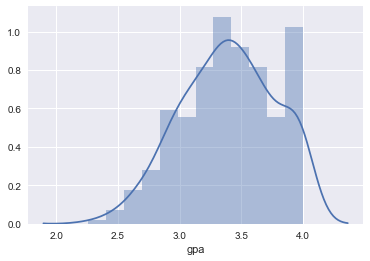

The skew is -0.216889
The kurtosis is -0.563570


In [9]:
# plot the distribution of each variable 
sns.distplot(df_raw_dropna.gpa)
sns.plt.show()
skew=df_raw_dropna.gpa.skew()
kurt=df_raw_dropna.gpa.kurt()
print("The skew is %f" % skew)
print("The kurtosis is %f" % kurt)


The GRE data is negatively skewed. The peakedness is realtively normal though as you can see in the density graph and from the kurtosis being close to 0. Overall the distribution is very close to being normally distributed.


/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


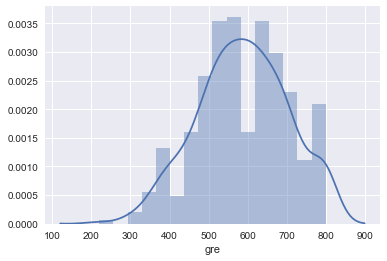

The skew is -0.146047
The kurtosis is -0.332864


In [10]:
sns.distplot(df_raw_dropna.gre)
sns.plt.show()
skew=df_raw_dropna.gre.skew()
kurt=df_raw_dropna.gre.kurt()
print("The skew is %f" % skew)
print("The kurtosis is %f" % kurt)

The prestige data is not skewed but the kurtosis is almost 1 meaning it is not normally distributed.

/Users/jordantuch/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


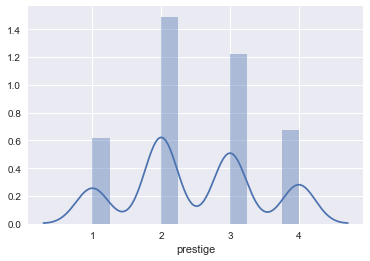

The skew is 0.086506
The kurtosis is -0.901038
There is also double the number of 2 and 3 prestige compared to 1 and 4


In [30]:
sns.distplot(df_raw_dropna.prestige)
sns.plt.show()
skew=df_raw_dropna.prestige.skew()
kurt=df_raw_dropna.prestige.kurt()
print("The skew is %f" % skew)
print("The kurtosis is %f" % kurt)
print ("There is also double the number of 2 and 3 prestige compared to 1 and 4")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, we would not meet the requirement of a normal distribution. The kurtosis is 1.8 and a normally distributed model should be close to 3. The Jacque-Bera test is also above a critical value of 5.99 (alpha=.05,df=2), meaning it is not normally distributed.

In [12]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ gre + gpa + prestige', data=df_raw_dropna).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           1.65e-08
Time:                        18:40:49   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: You could transform this data but it not so eregious in this case so I would not transform this data. The skew and kurtosis of each variable is not too far from zero. Also, while the distributions of the GRE and GPA data are negatively skewed, they are not skewed very far.

#### Question 11. Which of our variables are potentially colinear? 

In [13]:
# create a correlation matrix for the data
df_raw_dropna.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: None of the variables have a large correlation, which means we are not in danger having a multicolliearity issue. GPA and GRE have the largest correlation at .38, which is not a very strong correlation.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
<li> Find the skew and kurtosis to make sure there is a normal distibrution for the prestige variable</li>
<li>Complete a correlation matrix to ensure there is no collinearity</li>
<li>Run a linear model and look at the p-value and R^2 to see if there is any significange between prestige and admission rates</li>

#### Question 14. What is your hypothesis? 

Answer: Presitge is not a strong predictors if someone will gain admission to grad school. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

You could replace the missing value with the average of the column

In [14]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [15]:
#find the mean of each column
gre_mean=df_raw.gre.mean()
gpa_mean=df_raw.gpa.mean()
prestige_mean=df_raw.prestige.mean()

In [16]:
#fill na with mean value of its respective column
df_raw.gre=df_raw.gre.fillna(gre_mean)
df_raw.gpa=df_raw.gpa.fillna(gpa_mean)
df_raw.prestige=df_raw.prestige.fillna(prestige_mean)

In [17]:
#check to see that data was filled
df_raw.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data